# Building a Handwritten Digits Classifier
## Image classification using deep neural networks

- We plan to explore why image classification is a hard task
- Observe the limitations of traditional machine learning models for image classification
- Train, test and improve a few different deep neural networks for image classification

In [1]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits = load_digits()
digits.keys()

dict_keys(['DESCR', 'target', 'data', 'images', 'target_names'])

In [3]:
data = pd.DataFrame(digits['data'])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


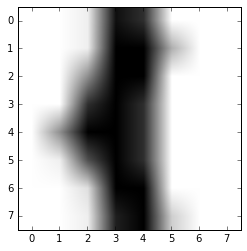

In [4]:
first_image = data.iloc[99]
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')

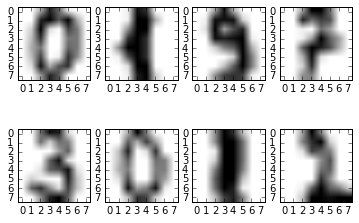

In [5]:
fig, ax = plt.subplots(2,4)

ax[0,0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
ax[0,1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
ax[0,2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
ax[0,3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

ax[1,0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
ax[1,1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
ax[1,2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
ax[1,3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

## Testing with K-Nearest Neighbors Model

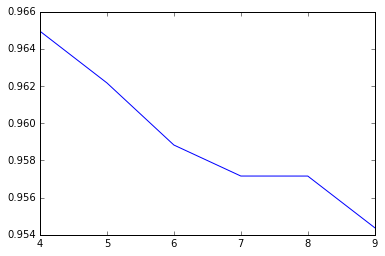

In [6]:
labels = pd.Series(digits['target'])

def train(num_neighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = num_neighbors)
    knn.fit(train_features, train_labels)
    return knn
    
def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    test_df = pd.DataFrame()
    test_df['correct_labels'] = test_labels
    test_df['predicted_labels'] = predictions
    accuracy = sum(test_df['correct_labels'] == test_df['predicted_labels'])/len(test_df)
    return accuracy

def cross_validate(k):
    accuracies = []
    kf = KFold(n_splits=4, random_state=1)
    for train_idx, test_idx in kf.split(data):
        train_features, test_features = data.loc[train_idx], data.loc[test_idx]
        train_labels, test_labels = labels.loc[train_idx], labels.loc[test_idx]
        model = train(k, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        accuracies.append(accuracy)
    return accuracies

k_vals = list(range(4,10))
k_val_accuracies = []

for k in k_vals:
    accuracies = cross_validate(k)
    k_mean_accuracy = np.mean(accuracies)
    k_val_accuracies.append(k_mean_accuracy)
    
plt.plot(k_vals, k_val_accuracies)

## Testing a neural network with a single hidden layer

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



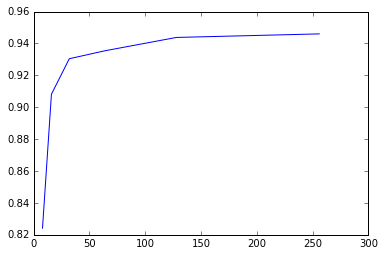

In [8]:
def train_nn(neur_layer_design, train_features, train_labels):
    model = MLPClassifier(hidden_layer_sizes=neur_layer_design)
    model.fit(train_features, train_labels)
    return model

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    test_df = pd.DataFrame()
    test_df['correct_labels'] = test_labels
    test_df['predicted_labels'] = predictions
    accuracy = sum(test_df['correct_labels'] == test_df['predicted_labels'])/len(test_df)
    return accuracy
    
def cross_validate(neur_layer_design):
    accuracies = []
    kf = KFold(n_splits=4, random_state=1)
    for train_idx, test_idx in kf.split(data):
        train_features, test_features = data.loc[train_idx], data.loc[test_idx]
        train_labels, test_labels = labels.loc[train_idx], labels.loc[test_idx]
        model = train_nn(neur_layer_design, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        accuracies.append(accuracy)
    return accuracies

nn_single_neurons = [(8,), (16,), (32,), (64,), (128,), (256,)]

nn_single_accuracies = []

for n in nn_single_neurons:
    accuracies = cross_validate(n)
    mean_accuracy = np.mean(accuracies)
    nn_single_accuracies.append(mean_accuracy)
    
x = [i[0] for i in nn_single_neurons]
plt.plot(x, nn_single_accuracies)

### Summary

It appears that adding to the number of neurons, we see an increase from about 83% to just over 94% in simple accuracy. 

Comparing this result with our K-Nearest Neighbors results of 94-96% accuracy, we really don't see any improvement from this model with a single hidden layer.

## Neural Network Model with Two Hidden Layers

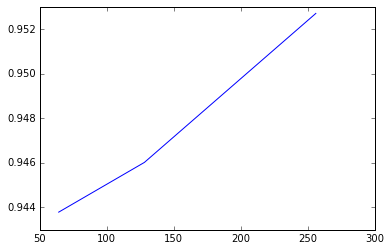

In [10]:
nn_two_layer_neurons = [(64,64), (128,128), (256,256)]

nn_two_layer_accuracies = []

for n in nn_two_layer_neurons:
    accuracies = cross_validate(n)
    mean_accuracy = np.mean(accuracies)
    nn_two_layer_accuracies.append(mean_accuracy)
    
x = [i[0] for i in nn_two_layer_neurons]
plt.plot(x, nn_two_layer_accuracies)

### Summary

It seems adding an additional hidden layer shows about a 2% increase in performance over the single hidden layer. Based on using KFolds as we have, this would seem to indicate it is a definite increase in performance.

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



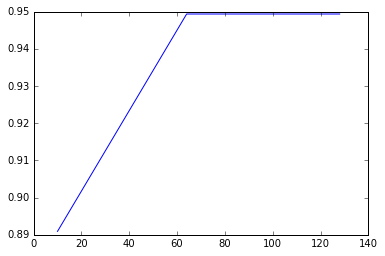

In [11]:
nn_three_layer_neurons = [(10,10,10), (64,64,64), (128,128,128)]

nn_three_layer_accuracies = []

for n in nn_three_layer_neurons:
    accuracies = cross_validate(n)
    mean_accuracy = np.mean(accuracies)
    nn_three_layer_accuracies.append(mean_accuracy)
    
x = [i[0] for i in nn_three_layer_neurons]
plt.plot(x, nn_three_layer_accuracies)

### Summary

By overall accuracies, it seems the two hidden layers neural network model has the best performance.

However, we begin to see an issue of overfitting for the model. We can see this with the cap it appears to have in accuracy for 64 and 128 neurons.